# Part II - Prosper Loan Amount Key Features Visualization
## by Wilson Okah

## Investigation Overview


> I focused on the influence of the Income range, Loan term, monthly income, credit grade, credit
score and the borrower's state on the Loan Amount.
I start by introducing the Loan Amount variable, followed by the pattern in Monthly income distribution, then the distribution of the credit score lower range, 
I introduced the categorical variables like the income range, credit score levels, borrower's state and credit grade. Boxplots, violin plots and trend lines were used to show the relationship between this variables and the original loan amount.
A scatter plot is used to show how the Loan Amount correlates with the Monthly loan payment. The states with the most borrowers were gotten and their average income and average loan amount was ploted to show the correlation betwwen higher income and higher loan Amount


## Dataset Overview

>The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
- The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv),
- with feature documentation available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')
#Selecting my rows of interest
loan_clean = loan[['ListingNumber', 'ListingCreationDate', 'CreditGrade','Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 
             'BorrowerRate','LenderYield', 'ProsperRating (Alpha)','ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
            'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration','IsBorrowerHomeowner', 'CreditScoreRangeLower','DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome','TotalProsperLoans',
             'LoanMonthsSinceOrigination', 'LoanOriginalAmount','LoanOriginationDate','MonthlyLoanPayment', 
             'PercentFunded', 'Recommendations']]
loan_clean.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),...,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,0.17,"$25,000-49,999",3083.333333,NaN,78,9425,2007-09-12 00:00:00,330.43,1.0,0
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,A,...,0.18,"$50,000-74,999",6125.000000,NaN,0,10000,2014-03-03 00:00:00,318.93,1.0,0
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,0.06,Not displayed,2083.333333,NaN,86,3001,2007-01-17 00:00:00,123.32,1.0,0
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,A,...,0.15,"$25,000-49,999",2875.000000,NaN,16,10000,2012-11-01 00:00:00,321.45,1.0,0
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,D,...,0.26,"$100,000+",9583.333333,1.0,6,15000,2013-09-20 00:00:00,563.97,1.0,0


In [3]:
#replacing  variable names for consistency 
loan_clean['IncomeRange'] = loan_clean['IncomeRange'].replace({'Not displayed':np.nan,'Not employed':'$0'})
# converting the data type for the date column to date data type
loan_clean["ListingCreationDate"] = pd.to_datetime(loan_clean['ListingCreationDate']).dt.date
loan_clean["ClosedDate"] = pd.to_datetime(loan_clean["ClosedDate"]).dt.date
loan_clean['LoanOriginationDate'] = pd.to_datetime(loan_clean['LoanOriginationDate']).dt.date
#identify the rows with duplicate entries and drop it 
print(loan_clean['ListingNumber'].duplicated().sum())
loan_clean['ListingNumber'].drop_duplicates(inplace=True)
# creating a single column for credit grade before 2009 and after 2009
col = ['CreditGrade','ProsperRating (Alpha)']
def join_all(x):
    return ','.join(x.dropna().astype(str))
loan_clean['Credit_rating']  = loan_clean[col].apply(join_all,axis=1)
loan_clean['Credit_rating'].replace({'':np.nan},inplace=True)
#converting the income range , credit Rating to an ordered categorical data
inc_range = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
incomes  = pd.api.types.CategoricalDtype(ordered=True,categories=inc_range)
loan_clean.IncomeRange = loan_clean.IncomeRange.astype(incomes)

credit_range = ['HR','E','D','C','B','A','AA']
credits  = pd.api.types.CategoricalDtype(ordered=True,categories=credit_range)
loan_clean.Credit_rating = loan_clean.Credit_rating.astype(credits)


871


In [4]:
loan_clean_state= loan_clean.loc[loan_clean.BorrowerState.isin(['CA', 'TX', 'NY', 'FL', 'IL','ND','ME','WY','IA','SD'])]
#Selecting the top 5 Borrowers State
loan_clean_state1 = loan_clean.loc[loan_clean.BorrowerState.isin(['ND','ME','WY','IA','SD'])]
loan_clean_state2 = loan_clean.loc[loan_clean.BorrowerState.isin(['CA','TX','NY','FL','IL'])]

In [5]:
loan_clean['Credit_rating'].replace({'NC':np.nan},inplace=True)
loan_clean.EmploymentStatus.replace({'Full-time':'Employed','Not available':np.nan},inplace=True)
loan_clean.rename({'ListingCategory (numeric)':'ListingCategory'},inplace=True)
bin_edges = [300,630,680,720,880 ]

# name of each credit score level
bin_names = ['Bad','Fair','Good','Excellent']

loan_clean['CreditScore_levels'] = pd.cut(loan_clean['CreditScoreRangeLower'], bin_edges, labels=bin_names)

# Checking for successful creation of this column
loan_clean.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),...,StatedMonthlyIncome,TotalProsperLoans,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Credit_rating,CreditScore_levels
0,193129,2007-08-26,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,...,3083.333333,NaN,78,9425,2007-09-12,330.43,1.0,0,C,Fair
1,1209647,2014-02-27,NaN,36,Current,NaT,0.12016,0.0920,0.0820,A,...,6125.000000,NaN,0,10000,2014-03-03,318.93,1.0,0,A,Fair
2,81716,2007-01-05,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,...,2083.333333,NaN,86,3001,2007-01-17,123.32,1.0,0,HR,Bad
3,658116,2012-10-22,NaN,36,Current,NaT,0.12528,0.0974,0.0874,A,...,2875.000000,NaN,16,10000,2012-11-01,321.45,1.0,0,A,Excellent
4,909464,2013-09-14,NaN,36,Current,NaT,0.24614,0.2085,0.1985,D,...,9583.333333,1.0,6,15000,2013-09-20,563.97,1.0,0,D,Fair


In [6]:
loan_clean_sub = loan_clean.loc[loan_clean.LoanStatus.isin(['Current','Completed','Chargedoff','Defaulted'])]

In [7]:
loan_clean['Occupation']=loan_clean['Occupation'].str.split('-').str[0].str.strip()
loan_clean_occupation = loan_clean.loc[loan_clean.Occupation.isin(['Professional', 'Executive', 'Accountant/CPA', 'Engineer', 'Sales','Computer Programmer','Student','Teacher','Analyst','Skilled Labor '])]

In [8]:
# crating a list of colours i want to work with 
base_color = sb.color_palette()[0]
base_color2 = sb.color_palette()[1]
base_color3 = sb.color_palette()[2]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution Of the Loan Original Amount

> The Original Loan Amount has a wide Range of values from \\$1000-35000. It is a  multimodal distibution and moost of the values fall between \\$5000 and \\$20000 and the peaks values are at 5000,10000,15000,20000 shows most loans are taken in the mutiples of 5000


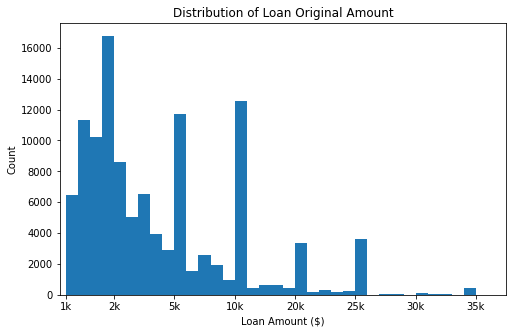

In [9]:
binsize = 1000
bins = np.arange(0, loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.xlim([500, 3.75e4])
plt.xticks([1e3, 5e3, 1e4,1.5e4, 2e4,2.5e4,3e4,3.5e4], [ '1k', '2k', '5k', '10k', '20k','25k','30k','35k'])
plt.title('Distribution of Loan Original Amount');

## Distribution Of the Monthly Income of borrowers

> The monthly income distribution is a  Unimodal distribution that shows that most borrowers have a monthly income within the ranges of \\$2500 and \\$10,000 With \$3000 dollars is the peak value

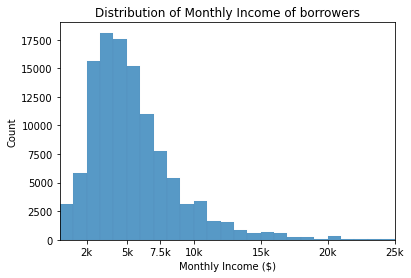

In [10]:
bins = np.arange(loan_clean['StatedMonthlyIncome'].min(),loan_clean['StatedMonthlyIncome'].max()+1000,1000)
sb.histplot(data=loan_clean,x='StatedMonthlyIncome',bins=bins)
plt.xlim(0,25000)
plt.xticks([2e3, 5e3,7.5e3, 1e4,1.5e4, 2e4,2.5e4], [ '2k', '5k','7.5k', '10k','15k' ,'20k','25k'])
plt.title('Distribution of Monthly Income of borrowers')
plt.xlabel('Monthly Income ($)');





## Credit Grade

> The credit grade ranges between HR being the worst grade and AA being the best grade 
most borrowers have a credit grade of D,C,B with most people having the C credit grade 

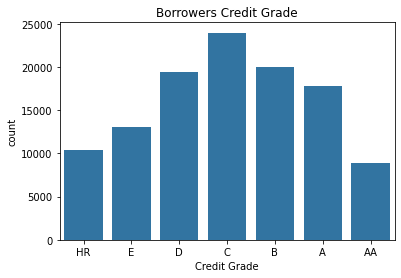

In [11]:
sb.countplot(data=loan_clean,x='Credit_rating',color=base_color)
plt.xlabel('Credit Grade')
plt.title('Borrowers Credit Grade');

## (Credit Score and Credit Score Levels)

>The credit score lower range has a unimodal distribution with its peak value at 700. The credit Score of most borrowers fall with the value of 600 and 800. The credit score ranges were grouped innto 4 levels 
- Bad = 300-629
- Fair = 630-679
- Good = 680- 719
- Excellent = 720-900

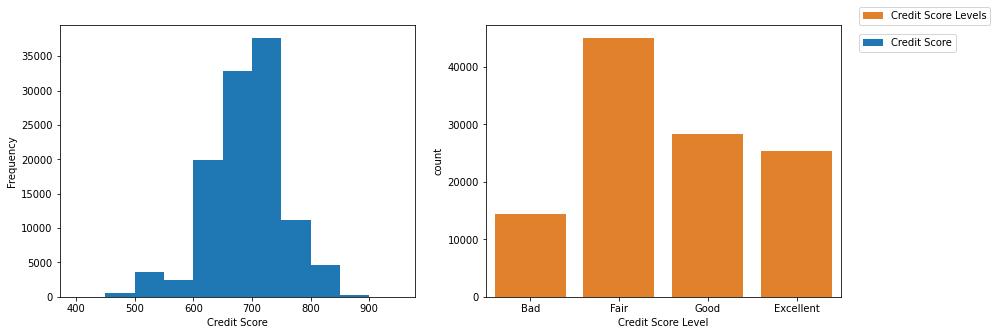

In [12]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
bins= np.arange(400,1000,50)
plt.hist(data=loan_clean, x='CreditScoreRangeLower',bins=bins,label='Credit Score')
plt.xlabel("Credit Score")
plt.ylabel('Frequency')
plt.legend(loc=(2.25,0.9))
plt.subplot(1,2,2)
sb.countplot(x='CreditScore_levels',data=loan_clean,color=base_color2,label='Credit Score Levels')
plt.xlabel('Credit Score Level')
plt.legend(loc=(1.05,1));


## Income Range 
> Most borrowers fall within the income range of \\$25,000 to \\$74,999k.  with \\$25,000- \\$49,999 having the highest count

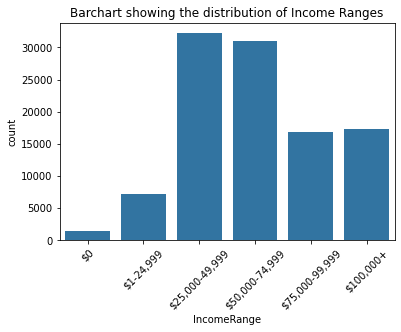

In [13]:
sb.countplot(data=loan_clean,x='IncomeRange',color=base_color)
plt.xticks(rotation=45)
plt.title('Barchart showing the distribution of Income Ranges');

## Scatter plot of Loan amount against the Monthly loan payment
> There is a strong postive correlation between the Loan Amount and the Monthly Loan Payment. The higher the Loan collected the higher the Monthly payment this is depicted in the scatter plot

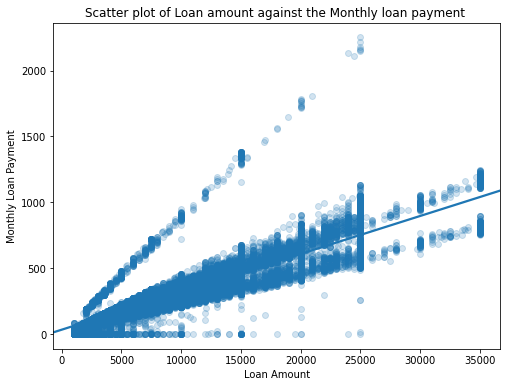

In [14]:
plt.figure(figsize = [8, 6])
sb.regplot(data=loan_clean,y='MonthlyLoanPayment',x='LoanOriginalAmount',truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/5})
plt.ylabel('Monthly Loan Payment')
plt.xlabel('Loan Amount')
plt.title('Scatter plot of Loan amount against the Monthly loan payment ');

## Trend of Loan Amount And Loan Payment by Year 
> There was a rise in the loan amount requested by borrowers up till 2007 then a sharp decline in the loan amount till 2009 then a steady increase in Average loan Amount between 2010 and 2014. The Payment made yearly follows a similar trend which is due to the strong correlation they have 
- The Average Loan Amount given every year is higher than the average Payment made on Loans every year. 

In [15]:
# to calculate the average loan amount given out every year 
yearly_amount  = loan_clean [['LoanOriginalAmount','LoanOriginationDate','MonthlyLoanPayment','StatedMonthlyIncome']]

yearly_amount['LoanOriginationYear']  = pd.to_datetime(yearly_amount['LoanOriginationDate']).dt.year
df1 = yearly_amount.groupby(by='LoanOriginationYear').mean()
df1['YearLoanPayment'] = df1['MonthlyLoanPayment'] *12
x =df1.index
df1.head()

,LoanOriginalAmount,MonthlyLoanPayment,StatedMonthlyIncome,YearLoanPayment
LoanOriginationYear,,,,
2005,3576.681818,102.434091,11123.106061,1229.209091
2006,4763.325262,168.256068,4743.658158,2019.072821
2007,7049.545026,247.308673,4654.253389,2967.704073
2008,6021.628289,209.800160,4618.913846,2517.601922
2009,4354.858818,155.009306,5091.736199,1860.111676


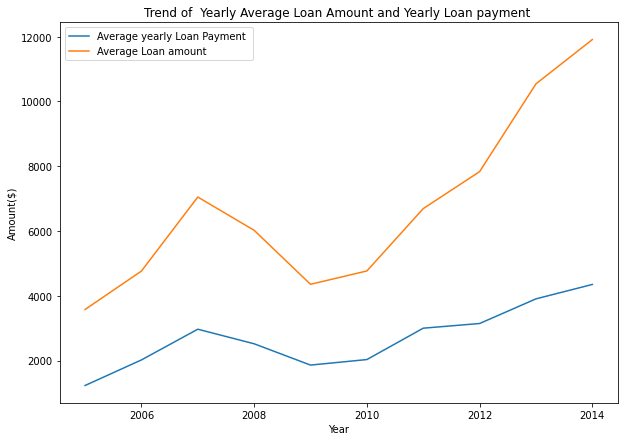

In [16]:
plt.figure(figsize = [10, 7])
plt.plot( x, df1['YearLoanPayment'],label='Average yearly Loan Payment ')
plt.plot( x, df1['LoanOriginalAmount'], label='Average Loan amount')
plt.xlabel('Year')
plt.ylabel('Amount($)')
plt.title('Trend of  Yearly Average Loan Amount and Yearly Loan payment ')
plt.legend();

In [17]:
#finding the average income paid by state 
df =loan_clean_state.groupby(by='BorrowerState').mean()[['LoanOriginalAmount','StatedMonthlyIncome']]
df.reset_index(inplace=True)

## Borrower's State and their Income Ranges
> States that have the most borrowers Like CA have a higher amount of people earning above \\$25,000 than states like ND who had the least amount of borrrowers.

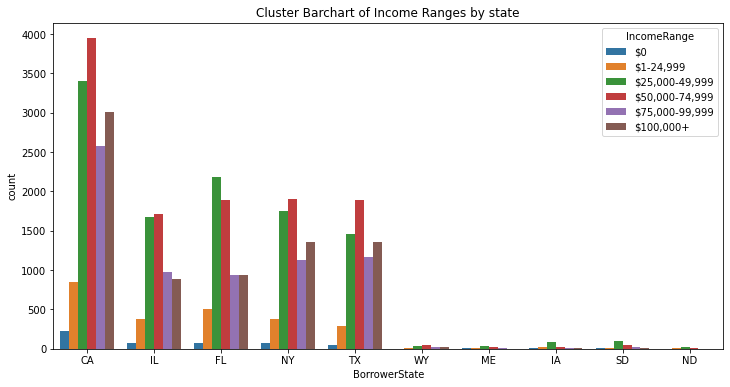

In [18]:
plt.figure(figsize = [12, 6])
sb.countplot(data = loan_clean_state, x = 'BorrowerState', hue = 'IncomeRange')
plt.title('Cluster Barchart of Income Ranges by state');

## Average Loan Amount and Average monthly income by state
> The cluster bar chart reveals how higher average income in a State leads to a  higher average loan amount borrowed in that state.

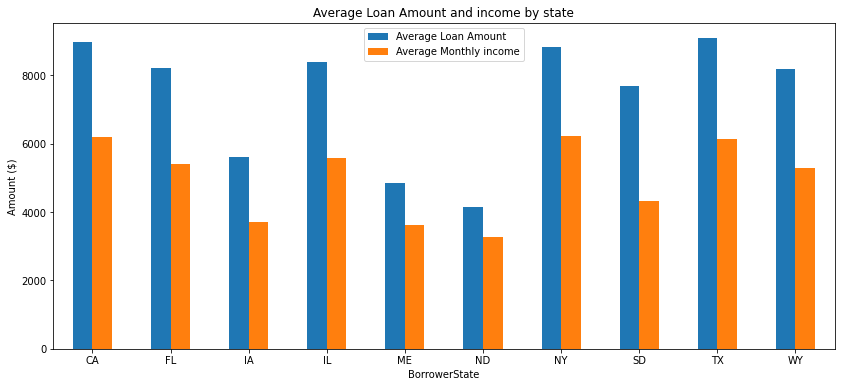

In [19]:
df.plot(x="BorrowerState", y=["LoanOriginalAmount", "StatedMonthlyIncome"], kind="bar",figsize=(14,6))
plt.legend(['Average Loan Amount','Average Monthly income'])
plt.xticks(rotation=360)
plt.ylabel('Amount ($)')
plt.title('Average Loan Amount and income by state');

## Correlation between Averge income and Average Loan Amount of 10 states
> There is a strong positive correlation between the Income earned by borrowers and the Amount borrowed. So States with higher income would have higher Loan Amounts being borrowed 

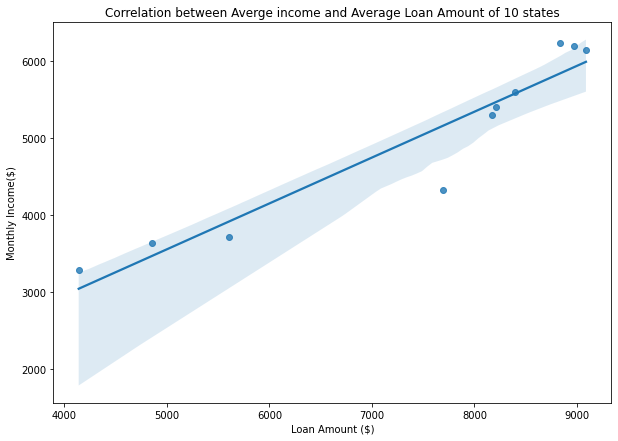

In [20]:
plt.figure(figsize=(10,7))
sb.regplot(data=df,x='LoanOriginalAmount',y='StatedMonthlyIncome')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Monthly Income($)')
plt.title('Correlation between Averge income and Average Loan Amount of 10 states');

In [21]:
loan_clean_credit =loan_clean.groupby(by='CreditScore_levels').mean()
loan_clean_credit.reset_index(inplace=True)

## Credit Score Levels and their respective Average Loan Amount
> There is a positive relationship betwwen your credit score level and Loan Amount you can borrow. The better the credit score level the higher the Loan Amount 

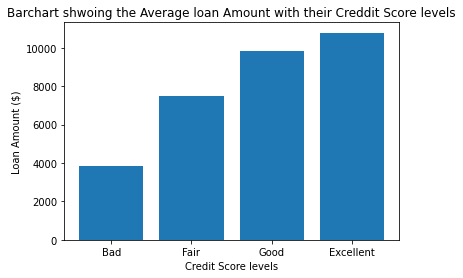

In [22]:
plt.bar(data=loan_clean_credit,x='CreditScore_levels',height='LoanOriginalAmount')
plt.xlabel('Credit Score levels')
plt.ylabel('Loan Amount ($)')
plt.title('Barchart shwoing the Average loan Amount with their Creddit Score levels');

## Boxplot and ViolinPlot of the Loan Status ,Term,Credit rating,Employment Status of the Loan Amount
> There is a positive relationship between the loan term and the Loan Amount Higher Terms would mean a larger Loan Amount 
- The Credit grade has a positive relationship with Loan Amount the better your creit grade the higher the Loan Amount 

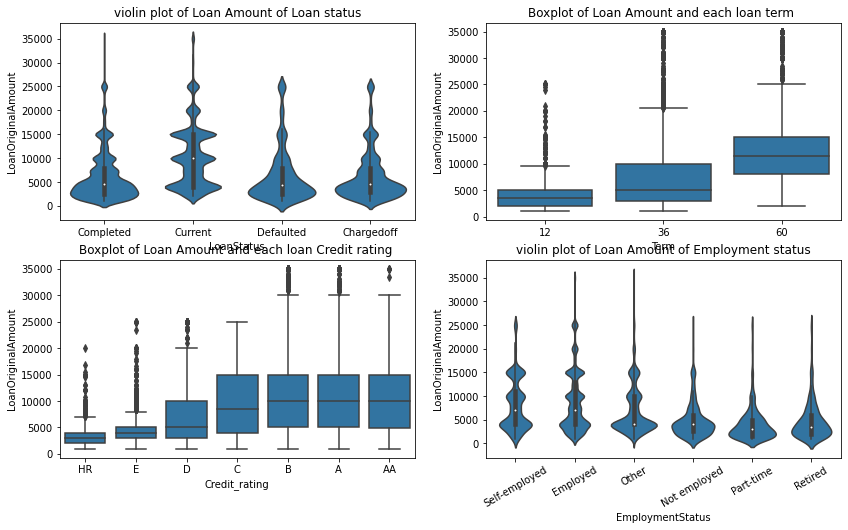

In [23]:
plt.figure(figsize = [14,8]) 
plt.subplot(2,2,1)
sb.violinplot(data=loan_clean_sub,x='LoanStatus',y='LoanOriginalAmount',color=base_color)
plt.title('violin plot of Loan Amount of Loan status')
plt.subplot(2,2,2)
sb.boxplot(data=loan_clean_sub,x='Term',y='LoanOriginalAmount',color=base_color)
plt.title('Boxplot of Loan Amount and each loan term ')
plt.subplot(2,2,3)
sb.boxplot(data=loan_clean_sub,x='Credit_rating',y='LoanOriginalAmount',color=base_color)
plt.title('Boxplot of Loan Amount and each loan Credit rating ')
plt.subplot(2,2,4)
sb.violinplot(data=loan_clean_sub,x='EmploymentStatus',y='LoanOriginalAmount',color=base_color)
plt.title('violin plot of Loan Amount of Employment status')
plt.xticks(rotation=30);

## Loan Amount vs Monthly loan payment by their employment status 
> Majority of Borrowers are employed there is a  linear trend between the Loan Amount and the Monthly amount paid irrespective of the borrowers employment status. So employment status has no effect on the trend as all trends display a high positive correlation

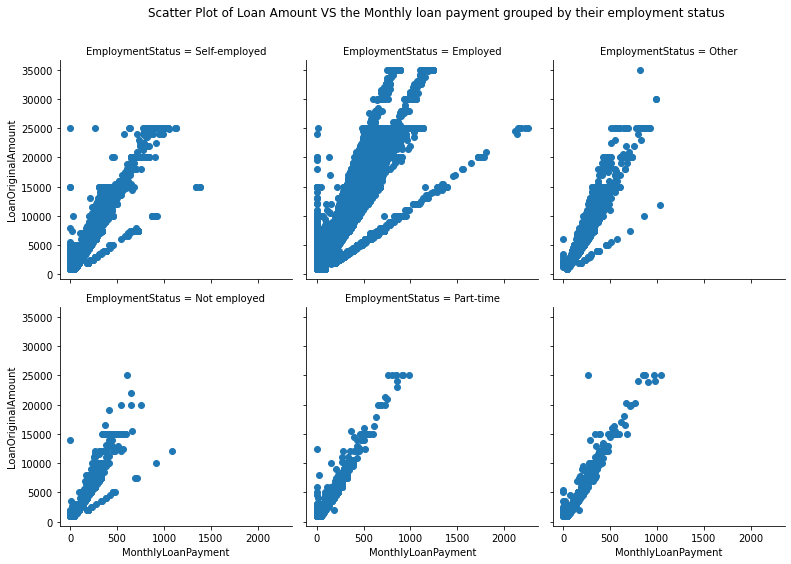

In [24]:
g1 = sb.FacetGrid(data = loan_clean, col = 'EmploymentStatus',col_wrap=3,size=3.7)
g1.map(plt.scatter,'MonthlyLoanPayment','LoanOriginalAmount')
plt.title('Scatter Plot of Loan Amount VS the Monthly loan payment grouped by their employment status',x=-0.5, y=2.3);

In [25]:
prp_sc = loan_clean.loc[~loan_clean.ProsperScore.isnull()]
prp_sc.ProsperScore = prp_sc.ProsperScore.astype(int).astype(str)
prp_sc =prp_sc[prp_sc.ProsperScore!='11']
score_scale = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
scores  = pd.api.types.CategoricalDtype(ordered=True,categories=score_scale)
prp_sc.ProsperScore = prp_sc.ProsperScore.astype(scores)

In [26]:
loan_emp = loan_clean.groupby(by='EmploymentStatus').mean().reset_index()

In [27]:
loan_emp.head()

,EmploymentStatus,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations
0,Employed,671779.526042,41.439884,0.218225,0.191163,0.181042,6.081742,2.954396,96.823954,0.528529,690.911109,0.257429,5830.427045,1.423675,27.460433,8781.411446,284.031314,0.998488,0.048753
1,Not employed,511242.330539,38.529341,0.275757,0.244079,0.233845,5.308166,4.259880,36.083933,0.253892,693.508982,3.056042,196.503693,1.226562,36.120958,4872.659880,182.908599,0.996001,0.071856
2,Other,819392.150815,41.082501,0.247302,0.213696,0.203696,5.167105,3.690751,102.201316,0.465055,695.233841,0.360403,3567.804191,1.393536,12.342091,6861.727010,232.196185,0.997878,0.005255
3,Part-time,308226.228860,36.286765,0.202211,0.184400,0.174058,6.800781,2.371324,37.370404,0.203125,659.375000,0.562363,1640.256587,1.215054,66.846507,4088.772059,140.799265,0.999897,0.181066
4,Retired,383346.154717,36.603774,0.215450,0.194442,0.184077,6.237057,2.867925,100.400000,0.480503,686.465409,0.398054,2987.477044,1.446640,56.216352,4784.145912,168.365472,1.000000,0.093082


## Relationship between Employment Status and Loan Amount
> Across the 6 Employment statuses identified **Employed** status has the highest average loan amount followed by those who are self employed. But suprisingly Those who are **Not Employed** have a higher averge Loan Amount that borrowers who work part time. this is depicted in the bar chart 

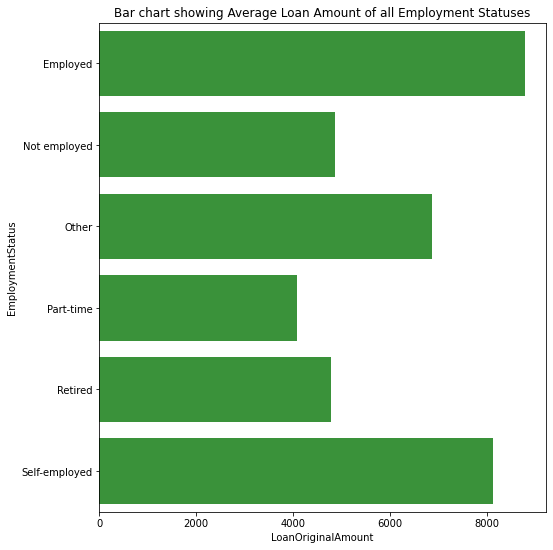

In [28]:
plt.figure(figsize=(8,9))
sb.barplot(data=loan_emp,y='EmploymentStatus',x='LoanOriginalAmount',color=base_color3)
plt.title('Bar chart showing Average Loan Amount of all Employment Statuses');

## Relationship between the Loan Term Loan Amount and the Borrower's Income Range
> There is a positive relattionship between the Loan Term and the LOan Amount , The Borrowe Income Range and the Loan Meaning . meaning a higher Term and a higher icome would lead to a higher loan Amount

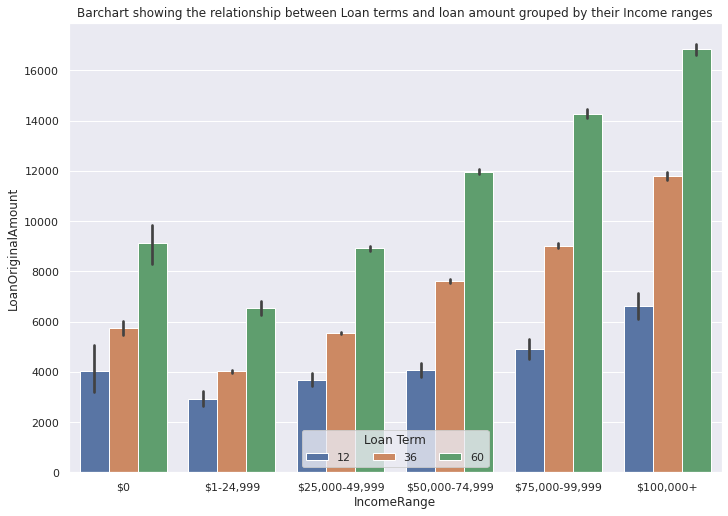

In [29]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
ax = sb.barplot(data = loan_clean, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 0.8, title = 'Loan Term')
plt.title('Barchart showing the relationship between Loan terms and loan amount grouped by their Income ranges');

## Loan Amount of the ***Five*** states with the most borrowers and their income ranges
> Betwwen the income ranges of \\$1 and \\$100k+ there is a similar trend across all states where an increase in uyour income range positively increases the Loan Amount with the Exception of the \\$0 income range which has suprisingly high values. Your state has no effect on your loan Amount

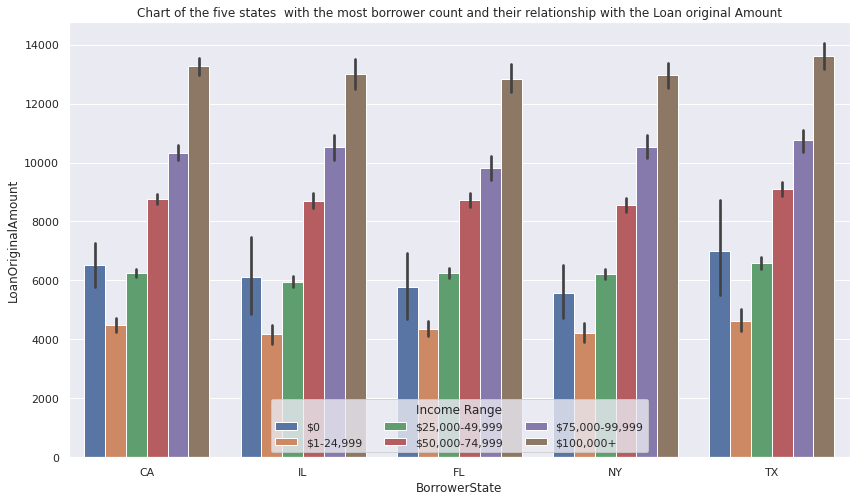

In [30]:
sb.set(rc={'figure.figsize':(14,8)})
ax = sb.barplot(data = loan_clean_state2, x = 'BorrowerState', y = 'LoanOriginalAmount', hue = 'IncomeRange')
ax.legend(loc = 8, ncol = 3, framealpha = 0.8, title = 'Income Range')
plt.title('Chart of the five states  with the most borrower count and their relationship with the Loan original Amount');

## Relationship between Occupation, Loan Amount and their Credit Score level
> The occupation of a borrower can influnece the loan Amount gotten as seen in the case of exectives. Because professsion infleunces your income range which has a positive effect on your loan Amount

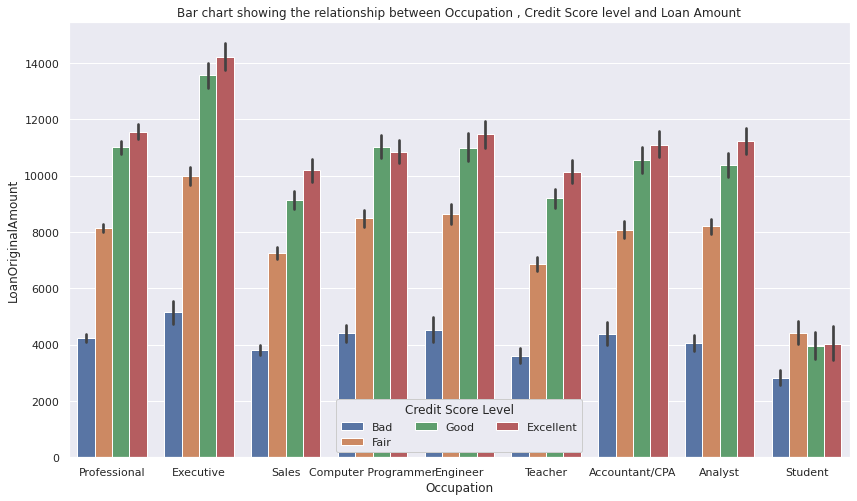

In [31]:
sb.set(rc={'figure.figsize':(14,8)})
ax = sb.barplot(data = loan_clean_occupation, x = 'Occupation', y = 'LoanOriginalAmount', hue = 'CreditScore_levels')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Credit Score Level')
plt.title('Bar chart showing the relationship between Occupation , Credit Score level and Loan Amount');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 862545 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
